In [1]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [2]:
%matplotlib inline

In [3]:
# Task 1
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [4]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [5]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['name','sex','number']))
    names_all[-1]['year'] = year

allyears = pd.concat(names_all)

In [6]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [8]:
# Task 2
totals_bysex = allyears.groupby(['sex', 'name'])['number'].sum().unstack('sex')

In [9]:
totals_bysex.head()

sex,F,M
name,,
Aaban,NaN,72.0
Aabha,21.0,NaN
Aabid,NaN,5.0
Aabriella,10.0,NaN
Aadam,NaN,196.0


In [10]:
# Task 3
totals_both = totals_bysex.sum(axis=1)

In [11]:
totals_both.head()

name
Aaban         72.0
Aabha         21.0
Aabid          5.0
Aabriella     10.0
Aadam        196.0
dtype: float64

In [12]:
ratio = totals_bysex['F'] / totals_bysex['M']

In [13]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [14]:
totals_both = totals_both[(ratio > 0.25) & (ratio < 4)]
totals_both = totals_both.sort_values(ascending=False)

In [15]:
totals_both.head(10)

name
Willie    593888.0
Jordan    479434.0
Taylor    416096.0
Leslie    376587.0
Jamie     350262.0
Angel     301425.0
Lee       291691.0
Jessie    274931.0
Marion    259549.0
Dana      243517.0
dtype: float64

In [16]:
# Task 4
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

def plotname(sex,name):
    data = allyears_indexed.loc[sex,name]
    pp.plot(data.index,data.values, label=name)

In [17]:
def topten(sex,year):
    simple = allyears_indexed.loc[sex,:,year].sort_values('number',ascending=False).reset_index()
    simple = simple.drop(['sex','year','number'],axis=1).head(10)
    
    simple.columns = [year]
    simple.index = simple.index + 1
    
    return simple

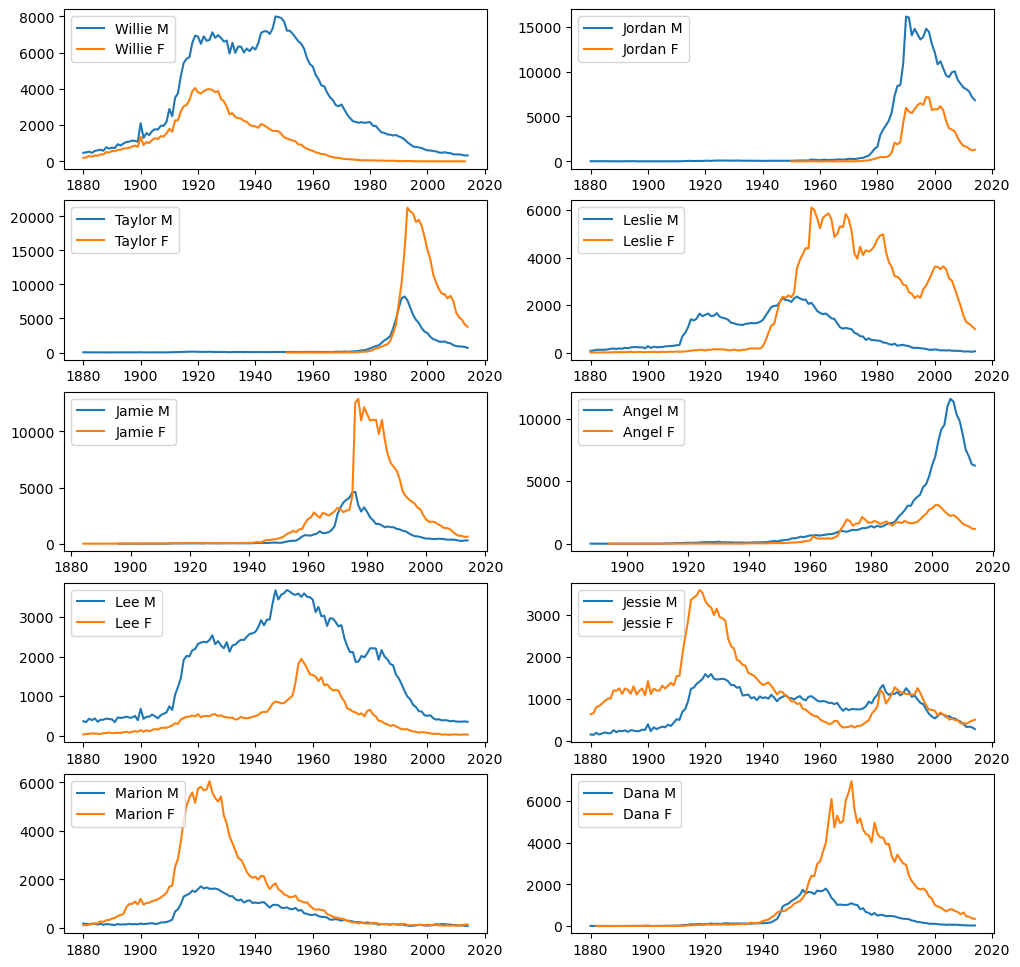

In [20]:
names = totals_both.head(10).index.values

pp.figure(figsize=(12,12))
for i,name in enumerate(names):
    pp.subplot(5,2,i+1)
    plotname('M',name)
    plotname('F',name)
    pp.legend([name + ' M',name + ' F'],loc='upper left')

# Display the final plot
pp.show()